# Benchmark

Benchmark of own codes compared to other packages.

In [1]:
# First import the package (this way pip install is not required).
import sys

sys.path.append("F:\BME\MSc\machine-learning")

## Distributions

### I. Normal distribution

Benchmarking the sampling function of the NormalDistribution's class and compare it to numpy's sampling method.

In [2]:
from scitools.distribution import NormalDistribution
import numpy as np
import time

# Benchmark params
num_of_samples = [100, 1000, 10_000, 100_000, 1_000_000, 10_000_000]
test_repeat = 50
res_scitools = []
res_numpy = []

# Benchmark functions
def benchmark_scitools(sample_num):
    start = time.time()
    NormalDistribution(0,1).sample(sample_num)
    end = time.time()
    return end - start

def benchmark_numpy(sample_num):
    start = time.time()
    np.random.normal(0,1,sample_num)
    end = time.time()
    return end - start

# Grid-benchmarking with parameters
for sample_num in num_of_samples:
    
    temp_scitools = []
    temp_numpy = []

    for n in range(test_repeat):
        temp_scitools.append(benchmark_scitools(sample_num))
        temp_numpy.append(benchmark_numpy(sample_num))
        
    res_scitools.append(temp_scitools)
    res_numpy.append(temp_numpy)

np.savetxt("normal_scitools.csv", res_scitools, delimiter=",")
np.savetxt("normal_numpy.csv", res_numpy, delimiter=",")

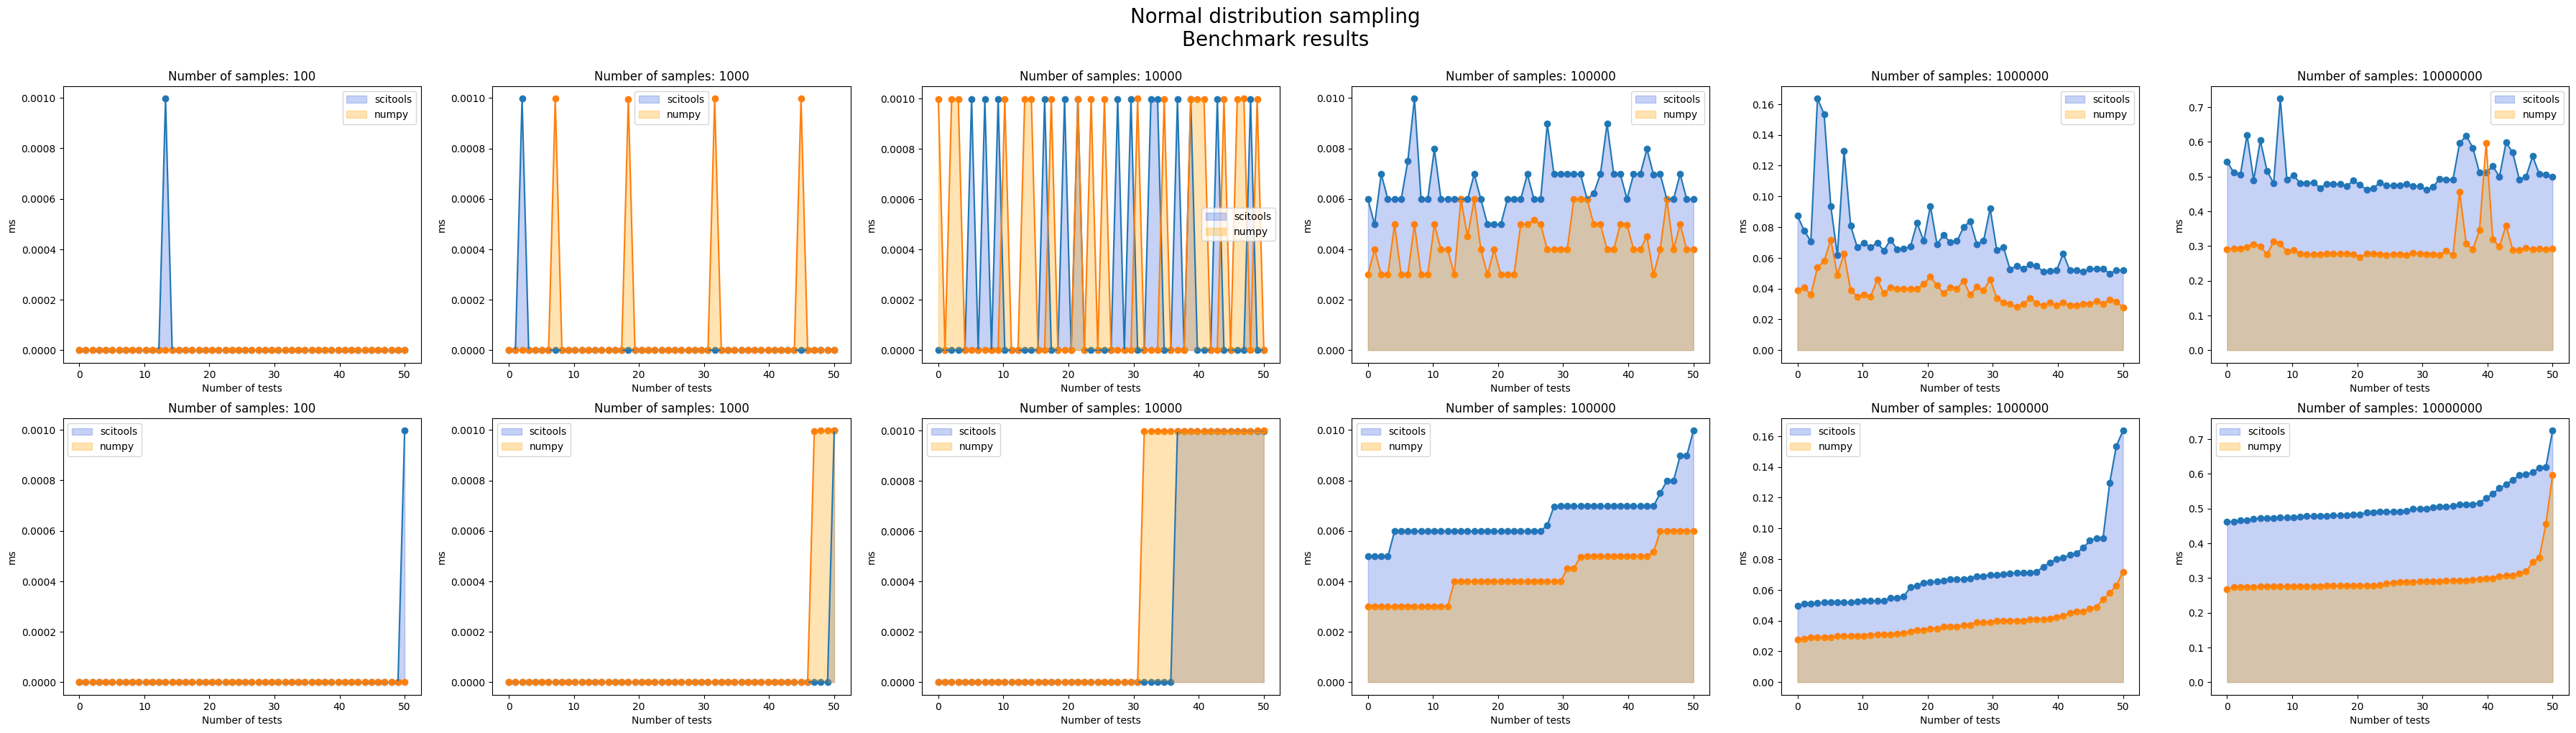

In [6]:
import matplotlib.pyplot as plt

axis = np.linspace(0,test_repeat,test_repeat)
fig, ax = plt.subplots(2, len(res_scitools) ,figsize=((len(res_scitools) + 3) * 5, 10 + 1))
fig.suptitle("Normal distribution sampling\nBenchmark results", fontsize=20)
for i in range(len(res_scitools)):
    # Scitools
    ax[0,i].scatter(axis, res_scitools[i])
    ax[0,i].plot(axis, res_scitools[i])
    ax[0,i].fill_between(axis, 0, res_scitools[i], color="royalblue", alpha=0.3, label="scitools")
    # Numpy
    ax[0,i].scatter(axis, res_numpy[i])
    ax[0,i].plot(axis, res_numpy[i])
    ax[0,i].fill_between(axis, 0, res_numpy[i], color="orange", alpha=0.3, label="numpy")
    # Settings
    ax[0,i].set_title("Number of samples: {}".format(num_of_samples[i]))
    ax[0,i].set_xlabel("Number of tests")
    ax[0,i].set_ylabel("ms")
    ax[0,i].legend()

    # Scitools - ordered
    ax[1,i].scatter(axis, np.sort(res_scitools[i]))
    ax[1,i].plot(axis, np.sort(res_scitools[i]))
    ax[1,i].fill_between(axis, 0, np.sort(res_scitools[i]), color="royalblue", alpha=0.3, label="scitools")
    # Numpy - ordered
    ax[1,i].scatter(axis, np.sort(res_numpy[i]))
    ax[1,i].plot(axis, np.sort(res_numpy[i]))
    ax[1,i].fill_between(axis, 0, np.sort(res_numpy[i]), color="orange", alpha=0.3, label="numpy")
    # Settings
    ax[1,i].set_title("Number of samples: {}".format(num_of_samples[i]))
    ax[1,i].set_xlabel("Number of tests")
    ax[1,i].set_ylabel("ms")
    ax[1,i].legend()
